In [1]:
import numpy as np
import pandas as pd

from finsim.data.preader import get_yahoofinance_data
from finsim.tech.ma import get_movingaverage_price_data

In [2]:
from matplotlib import pyplot as plt

In [3]:
startdate = '2022-01-01'
enddate = '2023-02-28'
dayswindow = 200
symbol = 'VOO'

In [4]:
df = get_yahoofinance_data(symbol, startdate, enddate)

[*********************100%***********************]  1 of 1 completed


In [5]:
madf = get_movingaverage_price_data(symbol, startdate, enddate, dayswindow)

[*********************100%***********************]  1 of 1 completed


In [6]:
assert len(df) == len(madf)

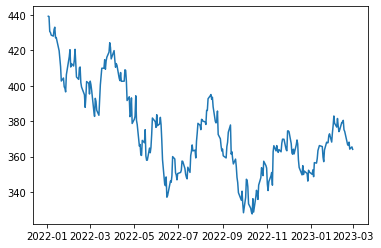

In [7]:
plt.plot(df['TimeStamp'].ravel(), df['Close'].ravel())

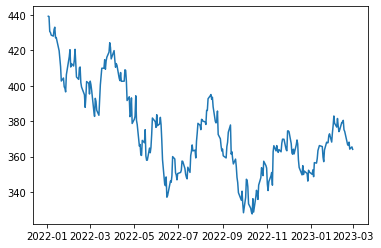

In [8]:
plt.plot(df['TimeStamp'].ravel(), df['Close'].ravel())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


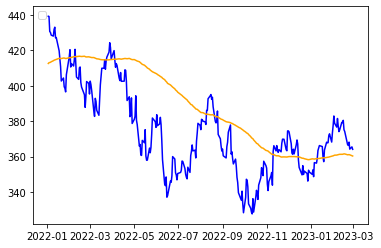

In [9]:
plt.plot(df['TimeStamp'].ravel(), df['Close'].ravel(), color='blue')
plt.plot(madf['TimeStamp'].ravel(), madf['MA'].ravel(), color='orange')
plt.legend(loc='upper left')

In [10]:
from plotnine import ggplot, aes, geom_line, ggtitle

In [11]:
plotdf = pd.concat([
    pd.DataFrame({
        'TimeStamp': df['TimeStamp'],
        'value': df['Close'],
        'plot': 'stock price'}),
    pd.DataFrame({
        'TimeStamp': madf['TimeStamp'],
        'value': madf['MA'],
        'plot': '200-day average'
    })
])

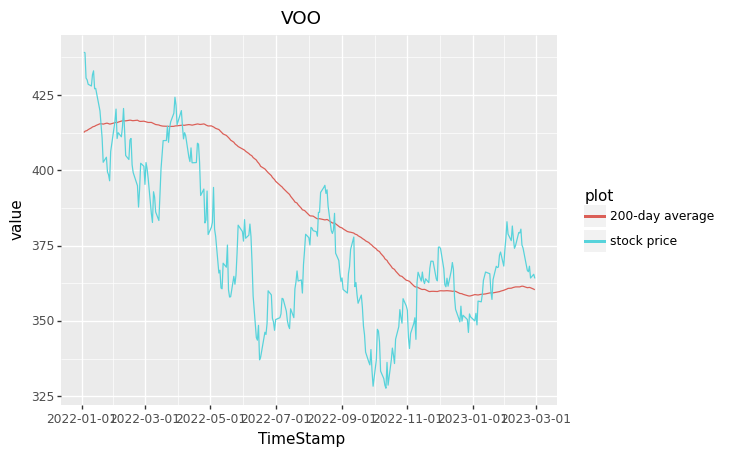

<ggplot: (8778640749701)>

In [12]:
ggplot(plotdf) + geom_line(aes('TimeStamp', 'value', color='plot')) + ggtitle(symbol)